<a href="https://colab.research.google.com/github/swaleha/Python/blob/master/Exploratory_data_analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory data analysis (EDA)

## Basic Terminology

* What is EDA?
* Data-point/vector/Observation
* Data-set.
* Feature/Variable/Input-variable/Dependent-varibale
* Label/Indepdendent-variable/Output-varible/Class/Class-label/Response label
* Vector: 2-D, 3-D, 4-D,.... n-D

Q. What is a 1-D vector: Scalar



## Iris Flower dataset

Toy  Dataset: Iris Dataset: [https://en.wikipedia.org/wiki/Iris_flower_data_set]
* A simple dataset to learn the basics.
* 3 flowers of Iris species. [see images on wikipedia link above]
* 1936 by Ronald Fisher.
* Petal and Sepal: http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg
*  Objective: Classify a new flower as belonging to one of the 3 classes given the 4 features.
* Importance of domain knowledge.
* Why use petal and sepal dimensions as features?
* Why do we not use 'color' as a feature?



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 22})

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Reading the data with pandas

In [ ]:
try:
    iris = pd.read_csv("iris.csv") # iris is a pandas dataframe
except FileNotFoundError:    
    import requests
    r = requests.get("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
    with open("iris.csv",'wb') as f: 
        f.write(r.content) 
    iris = pd.read_csv("iris.csv") 

In [ ]:
# iris
# iris.columns
# iris.head(2)
# iris.tail(2)
# iris.count()
# iris.shape
# iris.describe()            # stats on features
# iris["species"].count()    # counts all values 
# iris["species"].value_counts()       # counts distinct values - balanced data or not??
# iris.groupby(by="species").size()    
# iris.groupby(by="species").mean()    # mean of each col with distinct value of "species"
# iris.groupby(by="species").std()
# iris.groupby(by="species").count()

## 2-D Scatter Plot

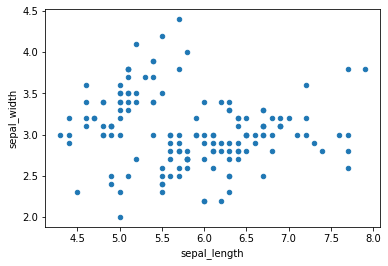

In [ ]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

iris.plot(kind='scatter', x='sepal_length', y='sepal_width') ;
plt.show()

#cannot make much sense out it. 
#What if we color the points by their class-label/flower-type.

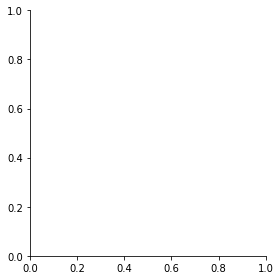

In [ ]:
sns.FacetGrid(iris, hue="species", height=4)

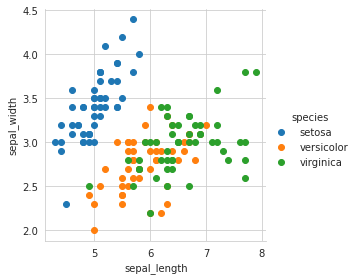

In [ ]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue="species", height=4) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()
plt.show()

# Try: 
#     FacetGrid - row, col

# Notice that the blue points can be easily seperated 
# from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many combinations exist? 4C2 = 6.

**Observation(s):**
1. Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
2. Seperating Versicolor from Viginica is much harder as they have considerable overlap.

## 3D Scatter plot

https://plot.ly/pandas/3d-scatter-plots/

Needs a lot to mouse interaction to interpret data.

What about 4-D, 5-D or n-D scatter plot?

## Pair-plot

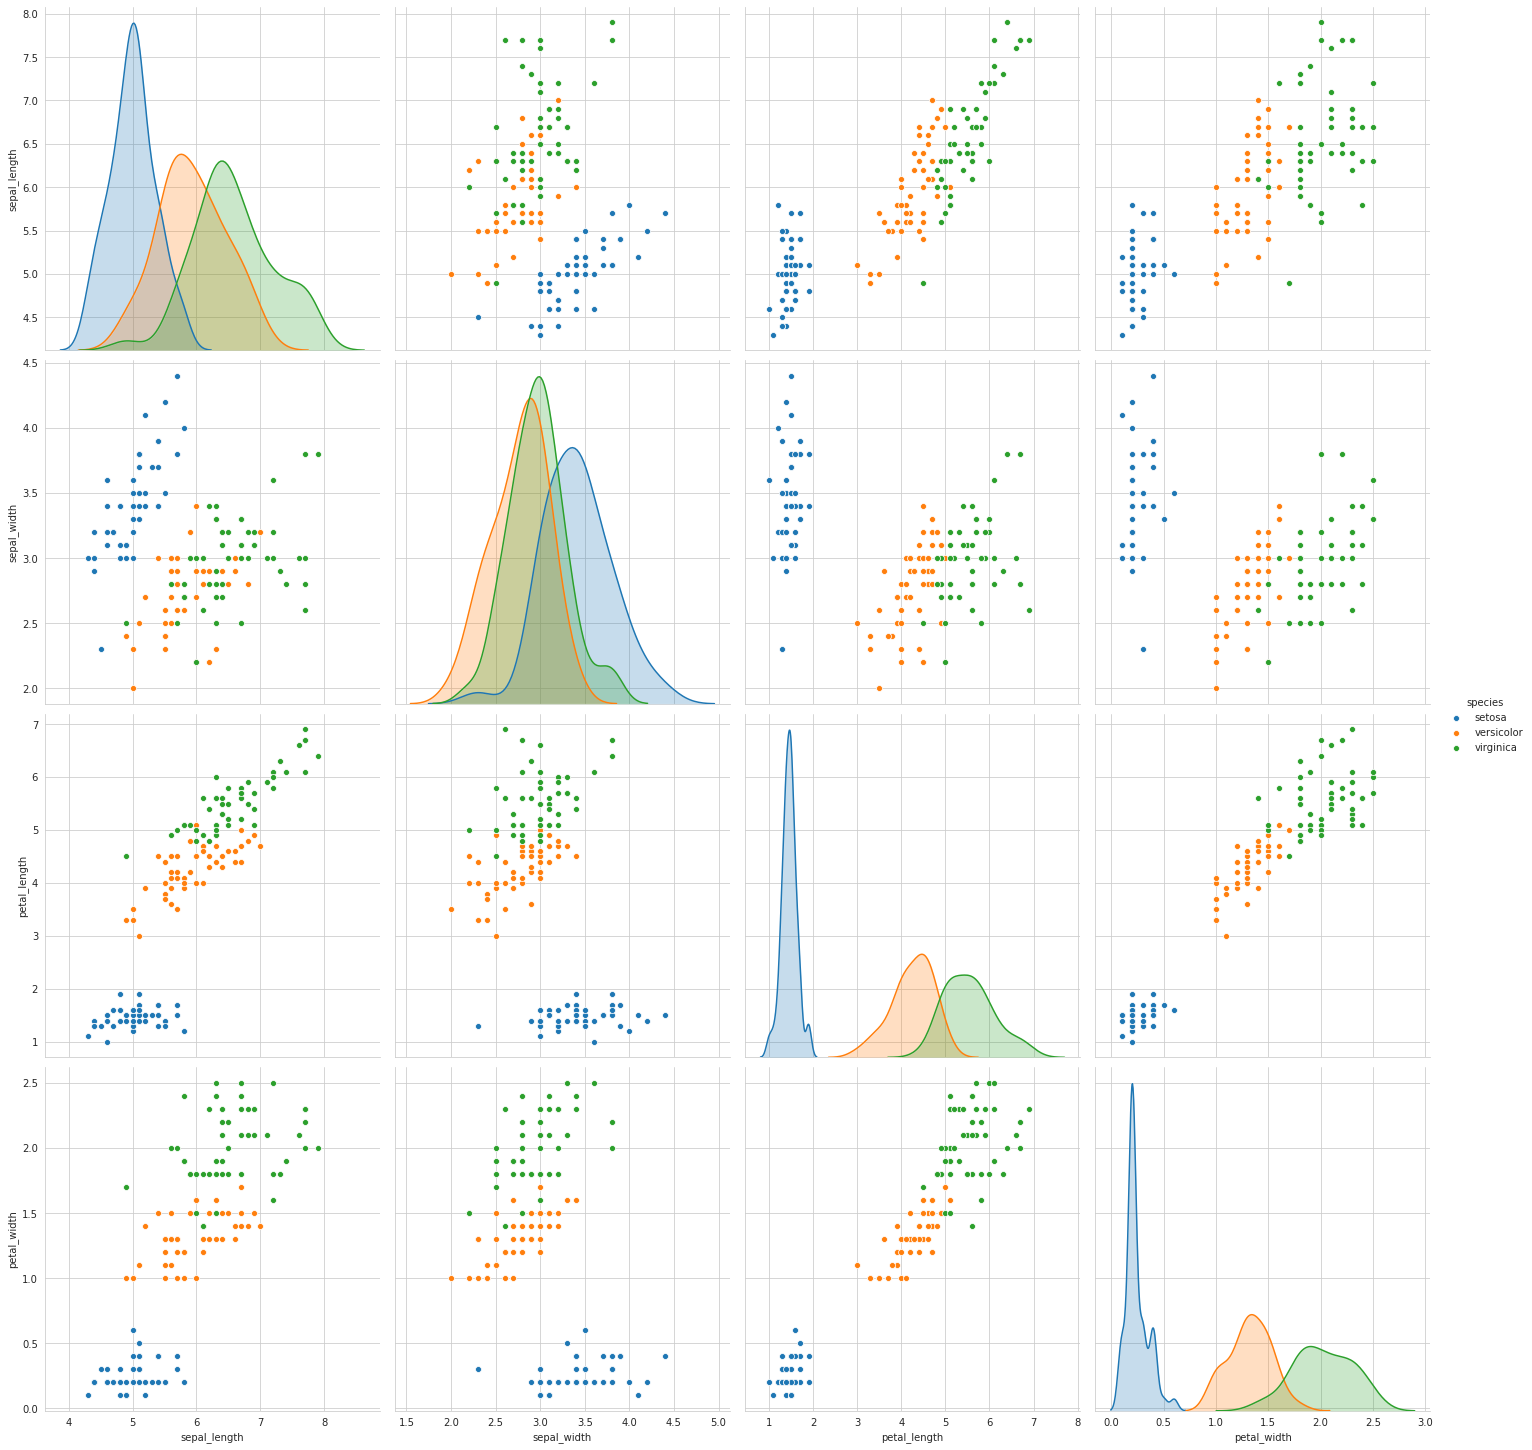

In [ ]:
# pairwise scatter plot: Pair-Plot
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris, hue="species", height=5);
plt.show()
# NOTE: the diagonal elements are PDFs for each feature. PDFs are expalined below.

**Observations**
1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

**Disadvantages**
- Can be used when number of features is not too large.
- Cannot visualize higher dimensional patterns in 3-D and 4-D. 
- Only possible to view 2D patterns.

**Ques**
- Could you give example of a data which is linealy separable in higher dimensional space but not in lower dimensional space?

# Probability Density Function and Histogram

When the number of samples is too large, scatter plot is not good, instead we use PDF

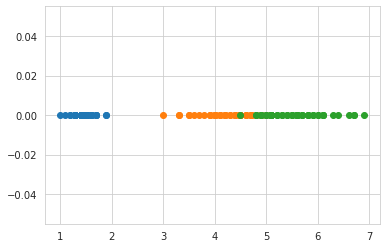

In [ ]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
import numpy as np
iris_setosa = iris.loc[iris["species"] == "setosa"]
iris_virginica = iris.loc[iris["species"] == "virginica"]
iris_versicolor = iris.loc[iris["species"] == "versicolor"]
#print(iris_setosa["petal_length"])
plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']), 'o')
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor['petal_length']), 'o')
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']), 'o')

plt.show()
# Disadvantages of 1-D scatter plot: Very hard to make sense as points 
# are overlapping a lot.
# Are there better ways of visualizing 1-D scatter plots?

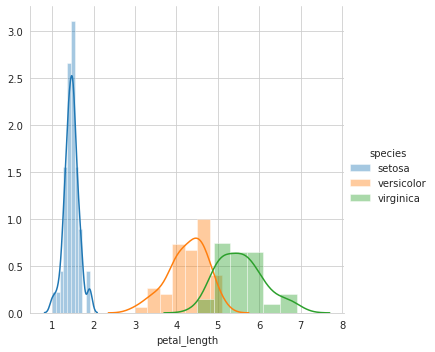

In [ ]:
sns.FacetGrid(iris, hue="species", height=5) \
   .map(sns.distplot, "petal_length") \
   .add_legend();
plt.show();

# Try:
#   map: petal_length, petal_width, sepal_length, sepal_width
# y[b] = (no of points falling in bin b)/((total no of points) * bin_width)
# pdf and not pmf

In [ ]:
# Histograms and Probability Density Functions (PDF) using KDE
# How to compute PDFs using counts/frequencies of data points in each window.
# How window width effects the PDF plot.


# Interpreting a PDF:
## why is it called a density plot?
## Why is it called a probability plot?
## for each value of petal_length, what does the value on y-axis mean?
# Notice that we can write a simple if..else condition as if(petal_length) < 2.5 then flower type is setosa.
# Using just one feature, we can build a simple "model" suing if..else... statements.

# Disadv of PDF: Can we say what percentage of versicolor points have a petal_length of less than 5?

# Do some of these plots look like a bell-curve you studied in under-grad?
# Gaussian/Normal distribution

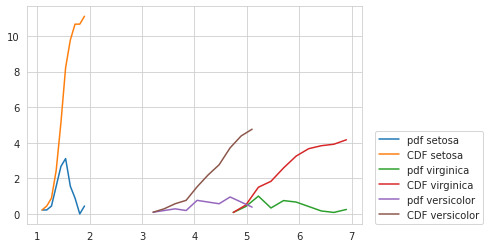

In [ ]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 5?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length
for species in ["setosa", "virginica", 'versicolor']:
    data = iris.loc[iris["species"] == species]
    counts, bin_edges = np.histogram(data['petal_length'], bins=10, 
                                     density = True)
    pdf = counts
    cdf = np.cumsum(pdf)
#     plt.figure()
    plt.plot(bin_edges[1:], pdf, label='pdf '+species)
    plt.plot(bin_edges[1:], cdf, label='CDF '+species)
plt.legend(loc=(1.04,0))
plt.show()

# Try:
#   data ... setosa, virginica, versicolor